In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("C:\ecommerce.csv.csv")
file_path = "C:\ecommerce.csv.csv"
column_names = ['A', 'B', 'C','D','E']
df = pd.read_csv(file_path, names=column_names)
df.head()


,A,B,C,D,E
0,-7.0237,-2.7803,-1.5966,0.2197,-5.9672
1,-9.4213,9.1296,7.2426,-4.7139,-5.2615
2,-9.3710,9.4341,6.1217,-3.4081,-7.5911
3,-2.5985,4.1524,3.1033,1.5943,-8.7513
4,-0.8058,10.4453,5.6170,1.5003,-5.7412


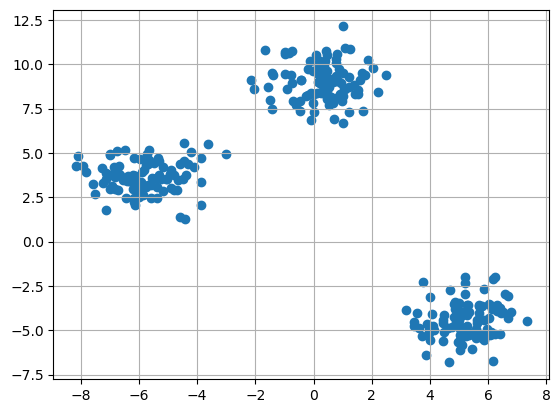

In [20]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 300,n_features = 2,centers = 3,random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [24]:
k = 4
 
clusters = {}
np.random.seed(23)
 
for i in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
     
    clusters[i] = cluster
     
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []}}

In [65]:
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=2.0, random_state=23)
kmeans = KMeans(n_clusters=4, random_state=40)
labels = kmeans.fit_predict(X)
cluster_counts = np.bincount(labels)

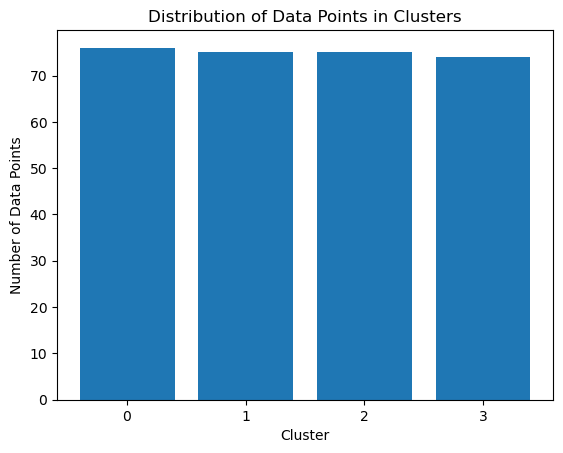

In [61]:
plt.bar(range(len(cluster_counts)), cluster_counts, tick_label=range(len(cluster_counts)))
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points in Clusters')
plt.show()

In [66]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

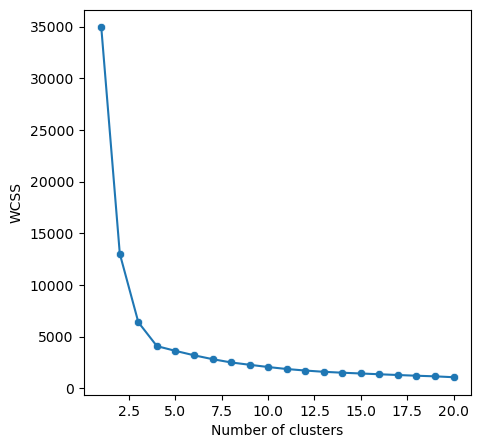

In [72]:
plt.figure(figsize=(5, 5))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Here by using the elbow method we can say that k = 6 is the optimal number of clusters that should be made as after k = 6 the value of 
#the inertia is not decreasing drastically.